In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
from matplotlib import pyplot as plt
import seaborn as sns

## Import the diabetes data

In [3]:
import numpy as np
df = pd.read_csv('datasets/diabetes.csv')
df['diabetes'] = np.where(df['diabetes']=='No diabetes', 0, 1)
df['chol_hdl_ratio'] = df['chol_hdl_ratio'].str.replace(',', '.').astype('float16')
df['bmi'] = df['bmi'].str.replace(',', '.').astype('float16')
df['waist_hip_ratio'] = df['waist_hip_ratio'].str.replace(',', '.').astype('float16')
df.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,3.900391,19,female,61,119,22.500000,118,70,32,38,0.839844,0
1,2,146,79,41,3.599609,19,female,60,135,26.406250,108,58,33,40,0.830078,0
2,3,217,75,54,4.000000,20,female,67,187,29.296875,110,72,40,45,0.890137,0
3,4,226,97,70,3.199219,20,female,64,114,19.593750,122,64,31,39,0.790039,0
4,5,164,91,67,2.400391,20,female,70,141,20.203125,122,86,32,39,0.819824,0


### Check distribution of diabetes

<Axes: >

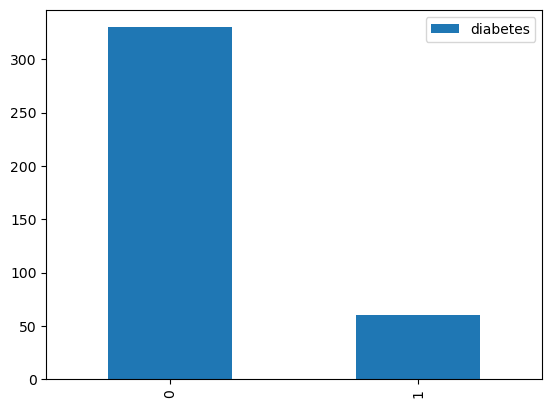

In [4]:
pd.DataFrame(df['diabetes'].value_counts()).plot(kind='bar')

## Create X and y datasets

In machine learning, we generally denote the training data as "X" and the target data as "y"

In [48]:
X = df.loc[:,['glucose', 'chol_hdl_ratio', 'gender']]
X['gender'] = np.where(X.gender=='female', 0, 1)
X['gender'] = X['gender'].astype('category')
y = df.diabetes

In [49]:
X.head()

,glucose,chol_hdl_ratio,gender
0,77,3.900391,0
1,79,3.599609,0
2,75,4.000000,0
3,97,3.199219,0
4,91,2.400391,0


In [32]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int32

### Create Train, Test data

In this case we are going to use simple train and test split of the dataset. We are not creating any validation dataset

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20, random_state=5)

In [34]:
X_train.shape

(312, 2)

In [35]:
y_train.shape

(312,)

In [36]:
X_test.shape

(78, 2)

## Define the logistic regression model and fit that model

In [37]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Check the model coefficients

In [38]:
pd.DataFrame({'feature': model.feature_names_in_.tolist(), 'coef': model.coef_[0].tolist()})

,feature,coef
0,glucose,0.033053
1,chol_hdl_ratio,0.231994


In [39]:
model.intercept_

array([-6.87761801])

### Check the accuracy of the trained model on training and test dataset

In [40]:
train_acc = model.score(X_train, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 91.66666666666666


In [41]:
y_pred = model.predict(X_test)
probs = model.predict_proba(X_test)
y_pred_probs = probs[:,1]
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 93.58974358974359


In [42]:
y_pred_probs

array([0.06417477, 0.98362413, 0.16173176, 0.07982156, 0.04348565,
       0.02170884, 0.05380323, 0.04042993, 0.06010935, 0.14834902,
       0.71207928, 0.0554457 , 0.04266587, 0.05884208, 0.05720239,
       0.07982156, 0.90491377, 0.99898493, 0.04333312, 0.04634732,
       0.3935985 , 0.03557978, 0.04877318, 0.04165297, 0.04225467,
       0.03982284, 0.02437565, 0.47895738, 0.95547754, 0.45548751,
       0.04006983, 0.11512398, 0.09635662, 0.06163059, 0.11193995,
       0.9970985 , 0.07790896, 0.01543662, 0.08152278, 0.03688382,
       0.09236876, 0.13894113, 0.02197681, 0.98991588, 0.12136118,
       0.04983508, 0.86516253, 0.03082326, 0.03297745, 0.96583987,
       0.05309139, 0.02947214, 0.06035251, 0.02197681, 0.21408776,
       0.06069946, 0.1218866 , 0.07372913, 0.06261157, 0.07338244,
       0.04891491, 0.13062839, 0.67140186, 0.04903591, 0.0187228 ,
       0.05559079, 0.15689656, 0.02240838, 0.03596572, 0.0873157 ,
       0.04345977, 0.06560442, 0.03460607, 0.02422696, 0.02240

### Check the confusion matrix

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        63
           1       1.00      0.67      0.80        15

    accuracy                           0.94        78
   macro avg       0.96      0.83      0.88        78
weighted avg       0.94      0.94      0.93        78



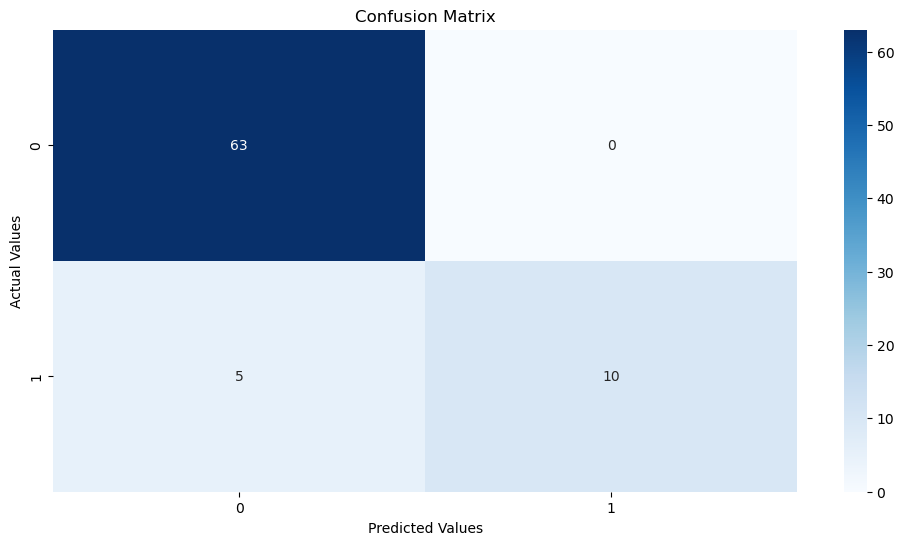

In [44]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

### Plot ROC curve

In [45]:
test_fpr, test_tpr, threshold = roc_curve(y_test, y_pred_probs)
test_roc_auc = auc(test_fpr, test_tpr)

In [46]:
train_fpr, train_tpr, threshold = roc_curve(y_train, model.predict_proba(X_train)[:, 1])
train_roc_auc = auc(train_fpr, train_tpr)

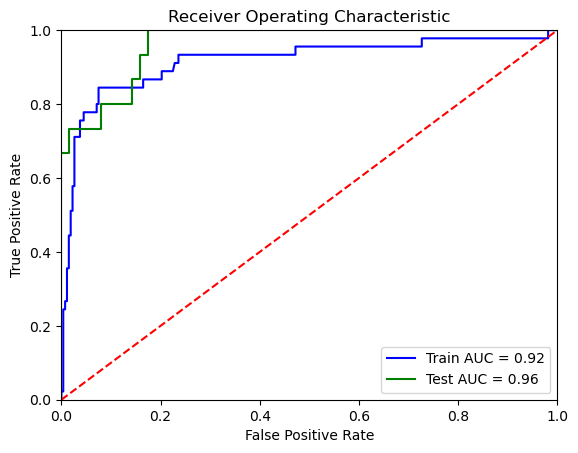

In [47]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(train_fpr, train_tpr, 'b', label = 'Train AUC = %0.2f' % train_roc_auc)
plt.plot(test_fpr, test_tpr, 'g', label = 'Test AUC = %0.2f' % test_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()